In [38]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('font', family='Arial') 
# matplotlib.rc('font', serif='Arial') 
matplotlib.rc('text', usetex='false') 


### Pressure Gradient

<Figure size 640x480 with 0 Axes>

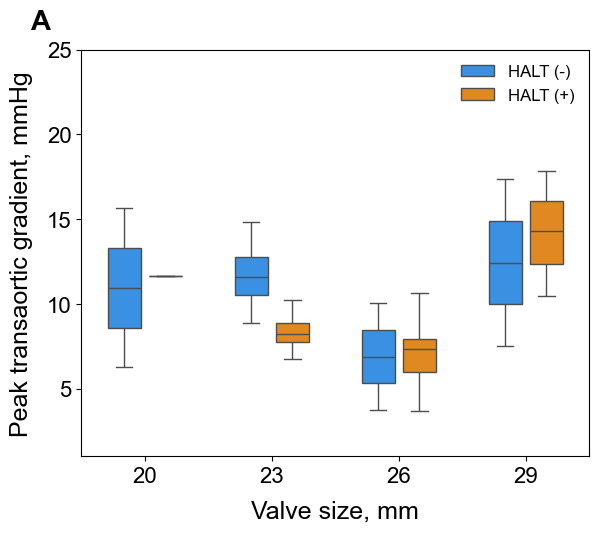

In [2]:
# Load data
df = pd.read_csv("CSVs/PressureGradient.csv")

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="Size",
    y="Pressure_gradient",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.2,
    width=0.65
    )
#plt.title("SAPIEN3")
plt.ylabel("Peak transaortic gradient, mmHg", fontsize=18, labelpad=10)
plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
plt.ylim(1.0, 25.0)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)
plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('peak_gradient.pdf', bbox_inches='tight')


### Pressure recovery -> HALT positive

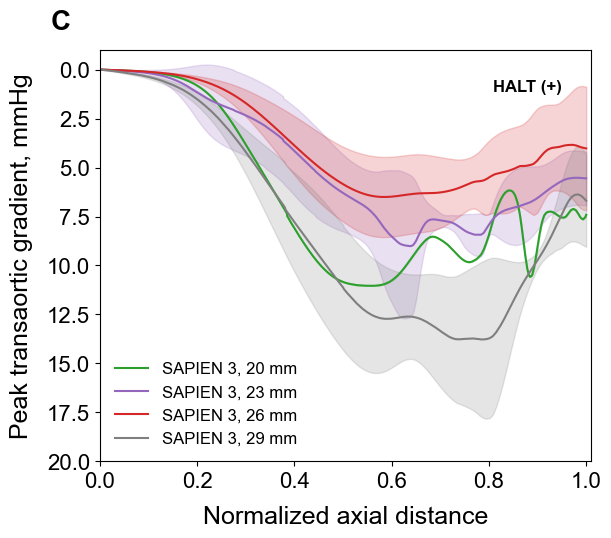

In [21]:
halt_pos_20 = pd.read_csv("CSVs/PressureRecovery/20mm_positive_PR.csv")
halt_pos_23 = pd.read_csv("CSVs/PressureRecovery/23mm_positive_PR.csv")
halt_pos_26 = pd.read_csv("CSVs/PressureRecovery/26mm_positive_PR.csv")
halt_pos_29 = pd.read_csv("CSVs/PressureRecovery/29mm_positive_PR.csv")
# halt_neg = pd.read_csv("CSVs/halt_negative.csv")

def process_group(df):
    pressures = []
    for i in range(0, df.shape[1], 2):
        arc = df.iloc[:, i].dropna().values
        pressure = np.abs(df.iloc[:, i+1].dropna().values)

        # ensure same length
        n = min(len(arc), len(pressure))
        arc = arc[:n]
        pressure = pressure[:n]

        # normalize arc length to [0,1]
        norm_arc = arc / arc.max()
        # interpolate to common grid
        grid = np.linspace(0, 1, 1000)  # adjust 200 for smoothness
        interp_pressure = np.interp(grid, norm_arc, pressure)
        pressures.append(interp_pressure)

    pressures = np.array(pressures)
    mean = pressures.mean(axis=0)
    std = pressures.std(axis=0)
    return grid, mean, std

# process both groups
x_pos_20, mean_pos_20, std_pos_20 = process_group(halt_pos_20)
x_pos_23, mean_pos_23, std_pos_23 = process_group(halt_pos_23)
x_pos_26, mean_pos_26, std_pos_26 = process_group(halt_pos_26)
x_pos_29, mean_pos_29, std_pos_29 = process_group(halt_pos_29)
# x_neg, mean_neg, std_neg = process_group(halt_neg)

# --- Plot ---
plt.figure(figsize=(6,5))

# HALT+
plt.plot(x_pos_20, mean_pos_20, color="#2CA02C", label=r"SAPIEN 3, 20 mm")
plt.fill_between(x_pos_20, mean_pos_20-std_pos_20, mean_pos_20+std_pos_20, color="#2CA02C", alpha=0.2)

plt.plot(x_pos_23, mean_pos_23, color="#9467BD", label="SAPIEN 3, 23 mm")
plt.fill_between(x_pos_23, mean_pos_23-std_pos_23, mean_pos_23+std_pos_23, color="#9467BD", alpha=0.2)

plt.plot(x_pos_26, mean_pos_26, color="#D62728", label="SAPIEN 3, 26 mm")
plt.fill_between(x_pos_26, mean_pos_26-std_pos_26, mean_pos_26+std_pos_26, color="#D62728", alpha=0.2)

plt.plot(x_pos_29, mean_pos_29, color="#7F7F7F", label="SAPIEN 3, 29 mm")
plt.fill_between(x_pos_29, mean_pos_29-std_pos_29, mean_pos_29+std_pos_29, color="#7F7F7F", alpha=0.2)

# HALT-
# plt.plot(x_neg, mean_neg, color="blue", label="HALT– (Mean)")
# plt.fill_between(x_neg, mean_neg-std_neg, mean_neg+std_neg, color="blue", alpha=0.2)
plt.gca().invert_yaxis()

#plt.title("SAPIEN3")
plt.xlabel("Normalized axial distance", fontsize=18, labelpad=10)
plt.ylabel("Peak transaortic gradient, mmHg", fontsize=18, labelpad=10)
plt.ylim(20.0, -1.0)
plt.xlim(0.0, 1.01)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)


plt.text(0.80, 0.9, "HALT (+)", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(-0.1, 1.05, "C", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('pressure_recovery_Hpos.pdf', bbox_inches='tight')


### Pressure recovery -> HALT negative

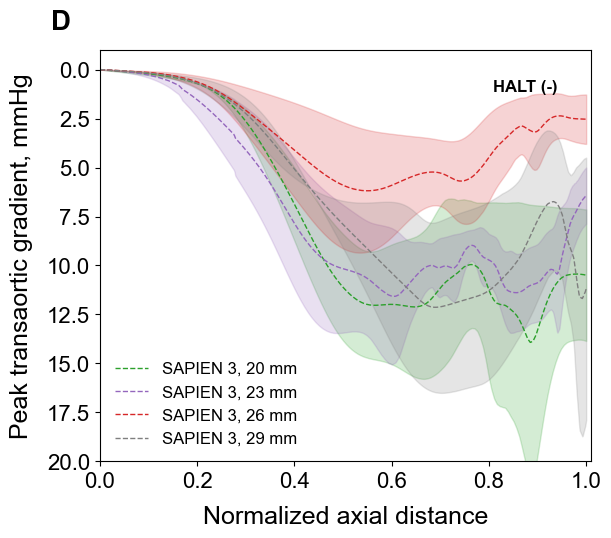

In [195]:
halt_neg_20 = pd.read_csv("CSVs/PressureRecovery/20mm_negative_PR.csv")
halt_neg_23 = pd.read_csv("CSVs/PressureRecovery/23mm_negative_PR.csv")
halt_neg_26 = pd.read_csv("CSVs/PressureRecovery/26mm_negative_PR.csv")
halt_neg_29 = pd.read_csv("CSVs/PressureRecovery/29mm_negative_PR.csv")

def process_group(df):
    pressures = []
    for i in range(0, df.shape[1], 2):
        arc = df.iloc[:, i].dropna().values
        pressure = np.abs(df.iloc[:, i+1].dropna().values)

        # ensure same length
        n = min(len(arc), len(pressure))
        arc = arc[:n]
        pressure = pressure[:n]

        # normalize arc length to [0,1]
        norm_arc = arc / arc.max()
        # interpolate to common grid
        grid = np.linspace(0, 1, 1000)  # adjust 200 for smoothness
        interp_pressure = np.interp(grid, norm_arc, pressure)
        pressures.append(interp_pressure)

    pressures = np.array(pressures)
    mean = pressures.mean(axis=0)
    std = pressures.std(axis=0)
    return grid, mean, std

# process both groups
x_neg_20, mean_neg_20, std_neg_20 = process_group(halt_neg_20)
x_neg_23, mean_neg_23, std_neg_23 = process_group(halt_neg_23)
x_neg_26, mean_neg_26, std_neg_26 = process_group(halt_neg_26)
x_neg_29, mean_neg_29, std_neg_29 = process_group(halt_neg_29)

# --- Plot ---
plt.figure(figsize=(6,5))

# HALT+
plt.plot(x_neg_20, mean_neg_20, color="#2CA02C", label="SAPIEN 3, 20 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_20, mean_neg_20-std_neg_20, mean_neg_20+std_neg_20, color="#2CA02C", alpha=0.2)

plt.plot(x_neg_23, mean_neg_23, color="#9467BD", label="SAPIEN 3, 23 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_23, mean_neg_23-std_neg_23, mean_neg_23+std_neg_23, color="#9467BD", alpha=0.2)

plt.plot(x_neg_26, mean_neg_26, color="#D62728", label="SAPIEN 3, 26 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_26, mean_neg_26-std_neg_26, mean_neg_26+std_neg_26, color="#D62728", alpha=0.2)

plt.plot(x_neg_29, mean_neg_29, color="#7F7F7F", label="SAPIEN 3, 29 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_29, mean_neg_29-std_neg_29, mean_neg_29+std_neg_29, color="#7F7F7F", alpha=0.2)

# HALT-
# plt.plot(x_neg, mean_neg, color="blue", label="HALT– (Mean)")
# plt.fill_between(x_neg, mean_neg-std_neg, mean_neg+std_neg, color="blue", alpha=0.2)
plt.gca().invert_yaxis()

#plt.title("SAPIEN3")
plt.xlabel("Normalized axial distance", fontsize=18, labelpad=10)
plt.ylabel("Peak transaortic gradient, mmHg", fontsize=18, labelpad=10)
plt.ylim(20.0, -1.0)
plt.xlim(0.0, 1.01)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(0.80, 0.9, "HALT (-)", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(-0.1, 1.05, "D", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('pressure_recovery_Hneg.pdf', bbox_inches='tight')

### Peak systolic Velocity

<Figure size 640x480 with 0 Axes>

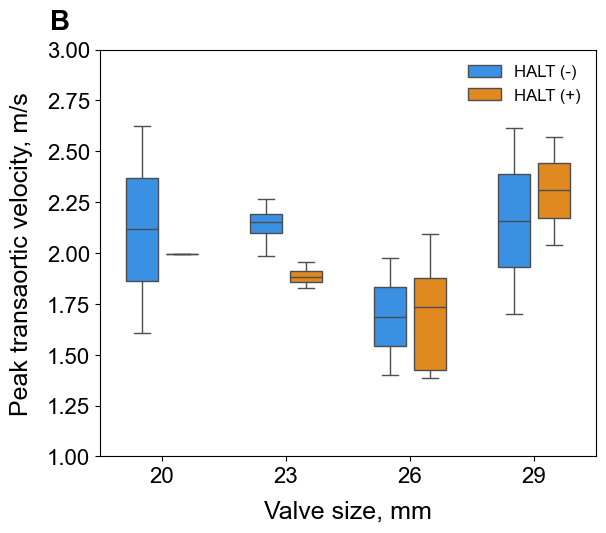

In [196]:
# Load data
df = pd.read_csv("CSVs/peak_systolic_velocity.csv")

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="Size",
    y="Vmax",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.2,
    width=0.65
    )
#plt.title("SAPIEN3")
plt.ylabel("Peak transaortic velocity, m/s", fontsize=18, labelpad=10)
plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
plt.ylim(1.0, 3.0)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(-0.1, 1.05, "B", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('peak_systolic_velocity.pdf', bbox_inches='tight')

### Correlation

# Reduced Flow - systolic

<Figure size 640x480 with 0 Axes>

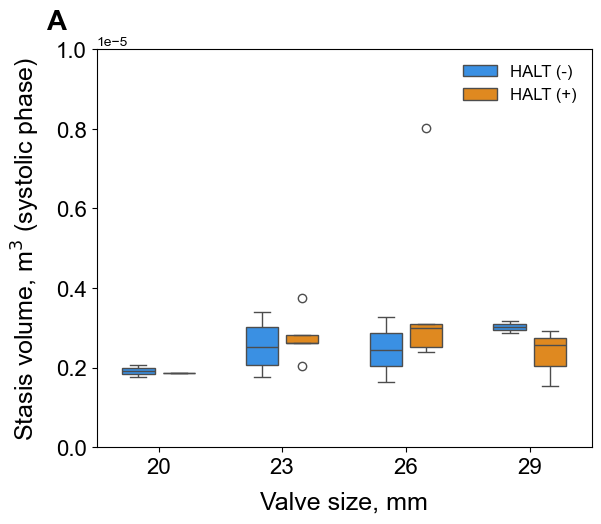

In [19]:
# Load data
df = pd.read_csv("CSVs/reduced_flow.csv")

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="Size",
    y="systolic",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.2,
    width=0.65
    )
#plt.title("SAPIEN3")
plt.ylabel("Stasis volume, m$^3$ (systolic phase)", fontsize=18, labelpad=10)
plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
plt.ylim(0.0, 1e-5)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('Stasis_vol_systolic.pdf', bbox_inches='tight')

# Reduced Flow - diastolic

<Figure size 640x480 with 0 Axes>

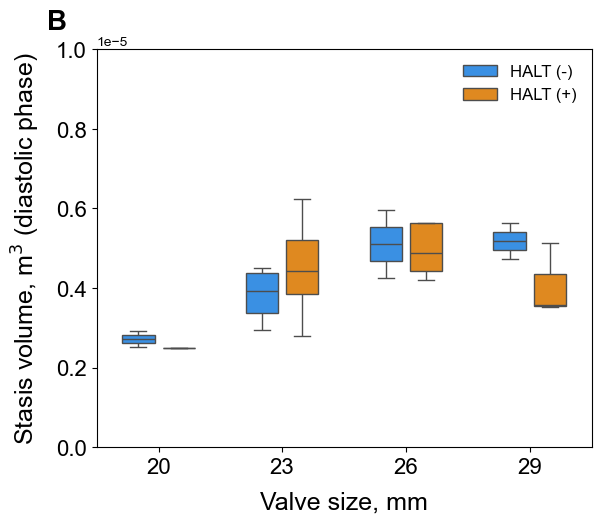

In [18]:
# Load data
df = pd.read_csv("CSVs/reduced_flow.csv")

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="Size",
    y="diastolic",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.2,
    width=0.65
    )
#plt.title("SAPIEN3")
plt.ylabel("Stasis volume, m$^3$ (diastolic phase)", fontsize=18, labelpad=10)
plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
plt.ylim(0.0, 1e-5)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(-0.1, 1.05, "B", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('Stasis_vol_diastolic.pdf', bbox_inches='tight')

# Helical Density

<Figure size 640x480 with 0 Axes>

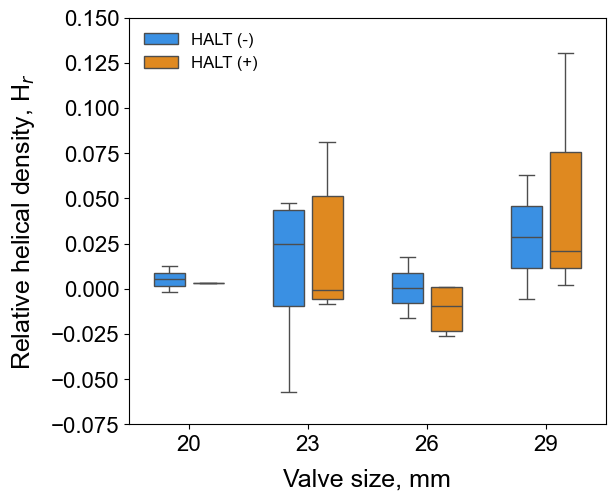

In [26]:
# Load data
df = pd.read_csv("CSVs/helical_density.csv")

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="Size",
    y="HelicalDensity",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.2,
    width=0.65
    )
#plt.title("SAPIEN3")
plt.ylabel("Relative helical density, H$_r$", fontsize=18, labelpad=10)
plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
plt.ylim(-0.075, 0.150)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

# plt.text(-0.1, 1.05, "B", transform=plt.gca().transAxes,
         # fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('Helical_density.pdf', bbox_inches='tight')

# Eccentricity

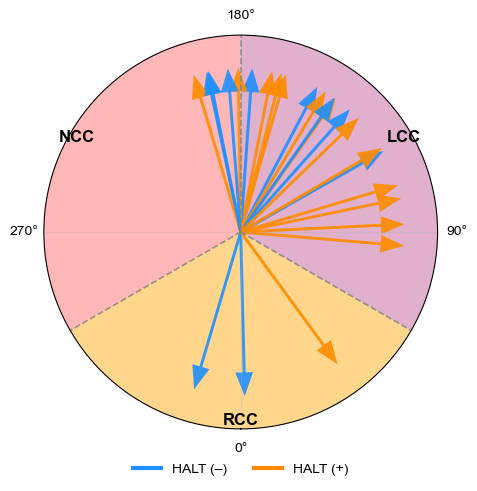

In [72]:
from matplotlib.lines import Line2D
from io import StringIO

# Data
data = """Case,Size,HALT_status,theta
1,20,HALT (-),191.947821383479
2,23,HALT (+),165.67855160039
3,23,HALT (+),101.811230544026
4,23,HALT (+),168.950435688976
5,26,HALT (-),152.206343779015
6,23,HALT (-),343.519819142062
7,23,HALT (+),196.626886827658
8,23,HALT (-),119.54561490965
9,26,HALT (+),85.183694540024
10,26,HALT (-),175.958066540072
11,29,HALT (+),106.569087744726
12,26,HALT (+),120.659773469909
13,23,HALT (-),1.40681841099598
14,20,HALT (+),144.621620452073
15,20,HALT (-),191.30489414209
16,23,HALT (-),138.327086742469
17,26,HALT (+),148.843268520955
18,29,HALT (+),92.7626034285031
19,29,HALT (-),145.052459018876
20,26,HALT (+),180.840740779898
21,29,HALT (+),133.997468109098
22,23,HALT (+),36.2294760606952
23,29,HALT (-),184.50260639148
24,26,HALT (+),164.015710974828
"""
df = pd.read_csv(StringIO(data))

# Convert theta to radians
df["theta_rad"] = np.deg2rad(df["theta"])

# Colors
C_POS = "darkorange"  # HALT (+)
C_NEG = "dodgerblue"  # HALT (–)

# Polar plot
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, polar=True)

# Define arrow length (larger = more visible)
arrow_length = 1.0  

# --- Background sectors with anatomical orientation ---
sectors = [
    ("NCC", 180, 300, "#FF6361"),   # lavender, posterior
    ("LCC",60 , 180, "#BC5090"),   # peach, right-anterior
    ("RCC", 300, 60, "#FFA600"),  # teal, left-anterior
]

for ang in [60, 180, 300]:
    ax.plot(
        [np.deg2rad(ang), np.deg2rad(ang)],
        [0, 2.05],
        color='gray', linestyle='--', linewidth=1.2, alpha=0.8
    )


for label, start_deg, end_deg, color in sectors:
    start_rad = np.deg2rad(start_deg)
    end_rad = np.deg2rad(end_deg)
    # handle wrap-around (NCC spans across 0°)
    if start_deg > end_deg:
        end_rad += 2 * np.pi
    ax.bar(x=start_rad, height=1.2, width=end_rad - start_rad,
           bottom=0, color=color, alpha=0.45, edgecolor='none', align='edge')
    # label each region near its midpoint
    mid_angle = np.deg2rad((start_deg + ((end_deg - start_deg) % 360) / 2) % 360)
    ax.text(mid_angle, 1.15, label, ha='center', va='center', fontsize=12, fontweight='bold')

for _, row in df.iterrows():
    color = C_POS if "(+)" in row["HALT_status"] else C_NEG
    ax.quiver(
        np.deg2rad(row["theta"]),   # angle (radians)
        0,                          # start radius
        0,                          # dtheta (angle increment)
        arrow_length,               # dr (arrow length)
        angles='xy',
        scale_units='xy',
        scale=1,
        color=color,
        linewidth=2.0,
        headwidth=6,
        headlength=8,
        headaxislength=8,
        alpha=0.9
    )

# Style
ax.set_ylim(0, 1.2)
ax.set_yticks([])
ax.set_theta_zero_location("S")
ax.set_theta_direction(1)
ax.set_thetagrids([0,90,180,270], labels=["0°","90°","180°","270°"])
ax.grid(alpha=0.3)

# Legend
handles = [
    Line2D([0], [0], color=C_NEG, lw=3, label="HALT (–)"),
    Line2D([0], [0], color=C_POS, lw=3, label="HALT (+)")
]
ax.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# plt.title("Jet Eccentricity Directions (Projected on Valve Plane)", pad=20)
plt.tight_layout()
# plt.show()
plt.savefig('eccentricity.pdf', bbox_inches='tight')

# WSS data

/tmp/ipykernel_1858606/3444465131.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Root", "LCC", "RCC", "NCC"], fontsize=18)


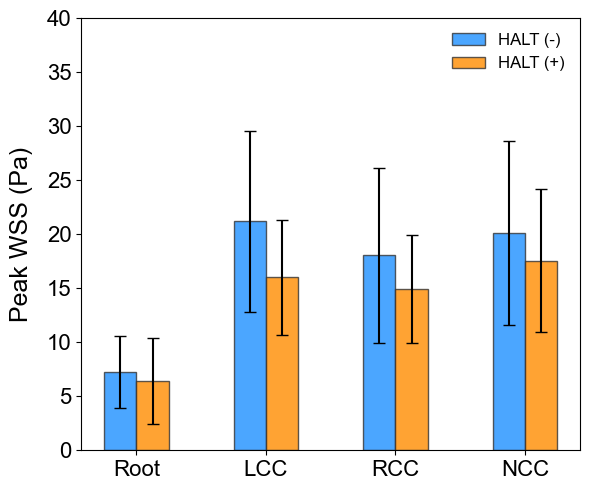

In [79]:
# --- Read data ---
df = pd.read_csv("CSVs/wss_data.csv")  # columns: Case, Size, HALT_status, Aortic_Root, LCC, RCC, NCC

# --- Prepare ---
regions = ["Aortic_Root", "LCC", "RCC", "NCC"]

# Split groups
pos = df[df["HALT_status"].str.contains(r"\+", regex=True)]
neg = df[df["HALT_status"].str.contains(r"\-", regex=True)]

# Compute means and SDs
mean_pos = pos[regions].mean()
std_pos  = pos[regions].std()
mean_neg = neg[regions].mean()
std_neg  = neg[regions].std()

# --- Plot ---
x = np.arange(len(regions))
width = 0.25

fig, ax = plt.subplots(figsize=(6,5))

bars_neg = ax.bar(x - width/2, mean_neg, width, yerr=std_neg, capsize=4,
                  color="dodgerblue", alpha=0.8, label="HALT (-)", edgecolor=(0.2,0.2,0.2,0.3))
bars_pos = ax.bar(x + width/2, mean_pos, width, yerr=std_pos, capsize=4,
                  color="darkorange", alpha=0.8, label="HALT (+)",  edgecolor=(0.2,0.2,0.2,0.3))
# "dodgerblue", "HALT (+)": "darkorange"},
# --- Style ---

# plt.ylabel("Stasis volume, m$^3$ (diastolic phase)", fontsize=18, labelpad=10)
# plt.xlabel("Valve size, mm", fontsize=18, labelpad=10)
# plt.ylim(0.0, 1e-5)
# ax=plt.gca()
# plt.tight_layout()
# ax.legend(fontsize=12, frameon=False)
# ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_ylabel("Peak WSS (Pa)", fontsize=18, labelpad=10)
ax.set_xticklabels(["Root", "LCC", "RCC", "NCC"], fontsize=18)
ax.set_xticks(x)
ax.set_ylim(0.0, 40.0)
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)
# plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
         # fontsize=20, fontweight="bold")



plt.tight_layout()
# plt.show()
plt.savefig('wss.pdf', bbox_inches='tight')

# Sinus washout - HALT (+)

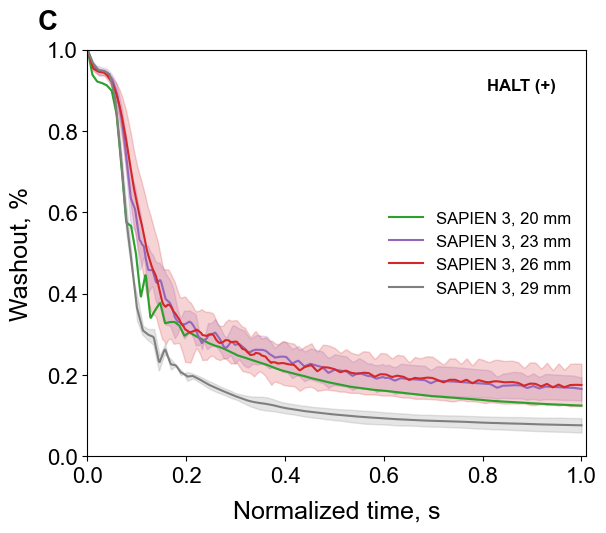

In [90]:
halt_pos_20 = pd.read_csv("CSVs/Washout/20mm_positive_wash.csv")
halt_pos_23 = pd.read_csv("CSVs/Washout/23mm_positive_wash.csv")
halt_pos_26 = pd.read_csv("CSVs/Washout/26mm_positive_wash.csv")
halt_pos_29 = pd.read_csv("CSVs/Washout/29mm_positive_wash.csv")
# halt_neg = pd.read_csv("CSVs/halt_negative.csv")

def process_group(df):
    pressures = []
    for i in range(0, df.shape[1], 2):
        arc = df.iloc[:, i].dropna().values
        pressure = np.abs(df.iloc[:, i+1].dropna().values)

        # ensure same length
        n = min(len(arc), len(pressure))
        arc = arc[:n]
        pressure = pressure[:n]

        # normalize arc length to [0,1]
        norm_arc = arc / arc.max()
        # interpolate to common grid
        grid = np.linspace(0, 1, 1000)  # adjust 200 for smoothness
        interp_pressure = np.interp(grid, norm_arc, pressure)
        pressures.append(interp_pressure)

    pressures = np.array(pressures)
    mean = pressures.mean(axis=0)
    std = pressures.std(axis=0)
    return grid, mean, std

# process both groups
x_pos_20, mean_pos_20, std_pos_20 = process_group(halt_pos_20)
x_pos_23, mean_pos_23, std_pos_23 = process_group(halt_pos_23)
x_pos_26, mean_pos_26, std_pos_26 = process_group(halt_pos_26)
x_pos_29, mean_pos_29, std_pos_29 = process_group(halt_pos_29)
# x_neg, mean_neg, std_neg = process_group(halt_neg)

# --- Plot ---
plt.figure(figsize=(6,5))

# HALT+
plt.plot(x_pos_20, mean_pos_20, color="#2CA02C", label=r"SAPIEN 3, 20 mm")
plt.fill_between(x_pos_20, mean_pos_20-std_pos_20, mean_pos_20+std_pos_20, color="#2CA02C", alpha=0.2)

plt.plot(x_pos_23, mean_pos_23, color="#9467BD", label="SAPIEN 3, 23 mm")
plt.fill_between(x_pos_23, mean_pos_23-std_pos_23, mean_pos_23+std_pos_23, color="#9467BD", alpha=0.2)

plt.plot(x_pos_26, mean_pos_26, color="#D62728", label="SAPIEN 3, 26 mm")
plt.fill_between(x_pos_26, mean_pos_26-std_pos_26, mean_pos_26+std_pos_26, color="#D62728", alpha=0.2)

plt.plot(x_pos_29, mean_pos_29, color="#7F7F7F", label="SAPIEN 3, 29 mm")
plt.fill_between(x_pos_29, mean_pos_29-std_pos_29, mean_pos_29+std_pos_29, color="#7F7F7F", alpha=0.2)

# HALT-
# plt.plot(x_neg, mean_neg, color="blue", label="HALT– (Mean)")
# plt.fill_between(x_neg, mean_neg-std_neg, mean_neg+std_neg, color="blue", alpha=0.2)
plt.gca().invert_yaxis()

#plt.title("SAPIEN3")
plt.xlabel("Normalized time, s", fontsize=18, labelpad=10)
plt.ylabel("Washout, %", fontsize=18, labelpad=10)
plt.ylim(0, 1.0)
plt.xlim(0.0, 1.01)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)


plt.text(0.80, 0.9, "HALT (+)", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(-0.1, 1.05, "C", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('washout_Hpos.pdf', bbox_inches='tight')


# Washout HALT (-ve)

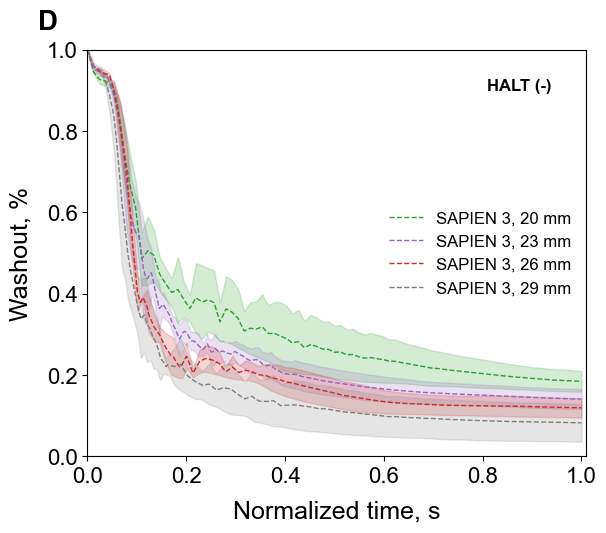

In [88]:
halt_neg_20 = pd.read_csv("CSVs/Washout/20mm_negative_wash.csv")
halt_neg_23 = pd.read_csv("CSVs/Washout/23mm_negative_wash.csv")
halt_neg_26 = pd.read_csv("CSVs/Washout/26mm_negative_wash.csv")
halt_neg_29 = pd.read_csv("CSVs/Washout/29mm_negative_wash.csv")

def process_group(df):
    pressures = []
    for i in range(0, df.shape[1], 2):
        arc = df.iloc[:, i].dropna().values
        pressure = np.abs(df.iloc[:, i+1].dropna().values)

        # ensure same length
        n = min(len(arc), len(pressure))
        arc = arc[:n]
        pressure = pressure[:n]

        # normalize arc length to [0,1]
        norm_arc = arc / arc.max()
        # interpolate to common grid
        grid = np.linspace(0, 1, 1000)  # adjust 200 for smoothness
        interp_pressure = np.interp(grid, norm_arc, pressure)
        pressures.append(interp_pressure)

    pressures = np.array(pressures)
    mean = pressures.mean(axis=0)
    std = pressures.std(axis=0)
    return grid, mean, std

# process both groups
x_neg_20, mean_neg_20, std_neg_20 = process_group(halt_neg_20)
x_neg_23, mean_neg_23, std_neg_23 = process_group(halt_neg_23)
x_neg_26, mean_neg_26, std_neg_26 = process_group(halt_neg_26)
x_neg_29, mean_neg_29, std_neg_29 = process_group(halt_neg_29)

# --- Plot ---
plt.figure(figsize=(6,5))

# HALT+
plt.plot(x_neg_20, mean_neg_20, color="#2CA02C", label="SAPIEN 3, 20 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_20, mean_neg_20-std_neg_20, mean_neg_20+std_neg_20, color="#2CA02C", alpha=0.2)

plt.plot(x_neg_23, mean_neg_23, color="#9467BD", label="SAPIEN 3, 23 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_23, mean_neg_23-std_neg_23, mean_neg_23+std_neg_23, color="#9467BD", alpha=0.2)

plt.plot(x_neg_26, mean_neg_26, color="#D62728", label="SAPIEN 3, 26 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_26, mean_neg_26-std_neg_26, mean_neg_26+std_neg_26, color="#D62728", alpha=0.2)

plt.plot(x_neg_29, mean_neg_29, color="#7F7F7F", label="SAPIEN 3, 29 mm", linestyle="--", linewidth=1.0)
plt.fill_between(x_neg_29, mean_neg_29-std_neg_29, mean_neg_29+std_neg_29, color="#7F7F7F", alpha=0.2)

# HALT-
# plt.plot(x_neg, mean_neg, color="blue", label="HALT– (Mean)")
# plt.fill_between(x_neg, mean_neg-std_neg, mean_neg+std_neg, color="blue", alpha=0.2)
plt.gca().invert_yaxis()

#plt.title("SAPIEN3")
plt.xlabel("Normalized time, s", fontsize=18, labelpad=10)
plt.ylabel("Washout, %", fontsize=18, labelpad=10)
plt.ylim(0, 1.0)
plt.xlim(0.0, 1.01)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(0.80, 0.9, "HALT (-)", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(-0.1, 1.05, "D", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('washout_Hneg.pdf', bbox_inches='tight')

# HALT Severity among patients

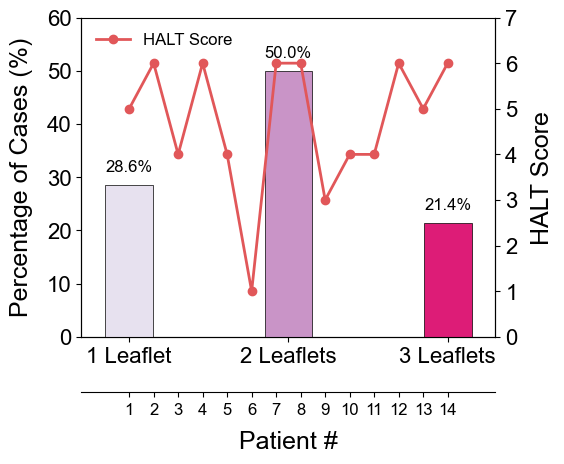

In [2]:
# Data
leaflet_labels = ['1 Leaflet', '2 Leaflets', '3 Leaflets']
percentages = [0.285714285714286, 0.5, 0.214285]
patient_ids = np.arange(1, 15)  # 1–14
halt_scores = [5, 6, 4, 6, 4, 1, 6, 6, 3, 4, 4, 6, 5, 6]

# Set up figure
fig, ax1 = plt.subplots(figsize=(6, 5))

# Choose modern, colorblind-friendly colors (ColorBrewer, or use seaborn)
bar_colors = ['#e7e1ef', '#c994c7', '#dd1c77']  # blue, orange, green

# Bar Chart
x = np.arange(len(leaflet_labels))
bars = ax1.bar(x, [p * 100 for p in percentages],
               color=bar_colors, edgecolor='black', linewidth=0.5, width=0.30, zorder=3)

ax1.set_ylabel("Percentage of Cases (%)", fontsize=18, labelpad=10)
# ax1.set_xlabel("Leaflet Involvement", fontsize=18, labelpad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(leaflet_labels, fontsize=16)
ax1.set_ylim(0, 60)
ax1.set_xlim(-0.3, 2.3)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Add % labels above bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 2,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Subtle grid for y only
# ax1.grid(axis='y', color='gray', linestyle='--', linewidth=0.8, alpha=0.4, zorder=0)

# HALT Scores Line/Scatter Trend (right axis)
ax2 = ax1.twinx()
ax2.plot(np.linspace(x[0], x[-1], len(patient_ids)), halt_scores,
         'o-', color='#E15759', linewidth=2, markersize=6, label="HALT Score", zorder=10)
ax2.set_ylabel("HALT Score", fontsize=18, labelpad=10)
# ax2.tick_params(axis='y', labelcolor='#E15759')

ax2.tick_params(axis='both', which='major', labelsize=16)

ax2.set_ylim(0, 7)
# ax2.spines['right'].set_color('#E15759')

# Optional: Legend for HALT line
ax2.legend(loc='upper left', fontsize=12, frameon=False)

# Patient IDs underneath
ax_bottom = ax1.secondary_xaxis('bottom')
bottom_positions = np.linspace(x[0], x[-1], len(patient_ids))
ax_bottom.set_xticks(bottom_positions)
ax_bottom.set_xticklabels(patient_ids, fontsize=10)
ax_bottom.spines['bottom'].set_position(("outward", 40))
ax_bottom.set_xlabel("Patient #", fontsize=18, labelpad=10)
ax_bottom.tick_params(axis='both', which='major', labelsize=12)

# Remove top spindle, boost whitespace
ax1.spines['top'].set_visible(False)
fig.tight_layout(pad=2.0)



# plt.show()
plt.savefig('HALT_severity.pdf', bbox_inches='tight')

## Eccentricity

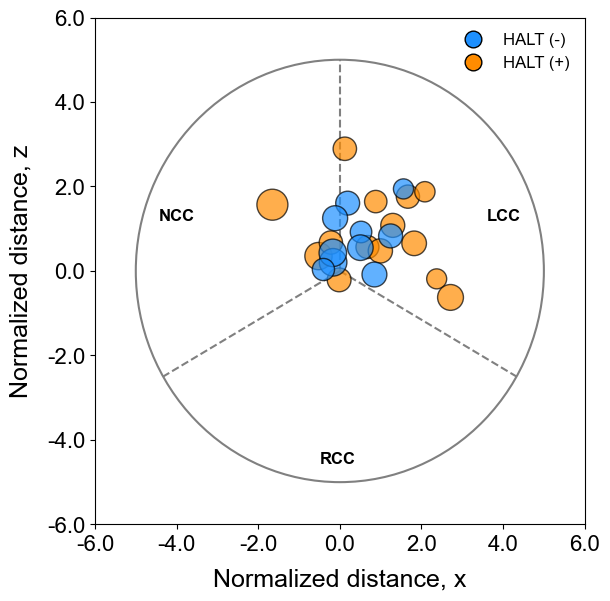

In [78]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Wedge
# Read the CSV
df = pd.read_csv('CSVs/jet_eccentricity.csv')


# Scale coordinates
df['x_scaled'] = df['x'] 
df['y_scaled'] = df['y'] 

# Marker size scaling factor (tune this if needed)
size_scale = 150
df['marker_size'] = df['Vmax'] * size_scale

# Split HALT (+) and HALT (-)
halt_pos = df[df['HALT_status'].str.strip() == 'HALT (+)']
halt_neg = df[df['HALT_status'].str.strip() == 'HALT (-)']

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(halt_pos['x_scaled'], halt_pos['y_scaled'],
            s=halt_pos['marker_size'], color='darkorange', alpha=0.7, label='HALT (+)', edgecolors='k', zorder=3)
plt.scatter(halt_neg['x_scaled'], halt_neg['y_scaled'],
            s=halt_neg['marker_size'], color='dodgerblue', alpha=0.7, label='HALT (-)', edgecolors='k', zorder=3)


# --- Add dashed radial lines (0° = 6 o’clock) ---
angles_deg = [60, 180, 300]
r_max = max(abs(plt.xlim()[0]), abs(plt.xlim()[1]),
            abs(plt.ylim()[0]), abs(plt.ylim()[1])) * 1.63

for angle in angles_deg:
    # Rotate coordinate system so 0° = 6 o’clock (i.e., +90° shift)
    theta = np.deg2rad(angle - 90)
    x_line = [0, r_max * np.cos(theta)]
    y_line = [0, r_max * np.sin(theta)]
    plt.plot(x_line, y_line, linestyle='--', color='gray', linewidth=1.5, zorder=1)


circle = plt.Circle((0, 0), 5.0, color='gray', fill=False, linestyle='-', linewidth=1.5, zorder=1)
plt.gca().add_artist(circle)


#plt.title("SAPIEN3")
# --- Format tick labels to 1 decimal place ---
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.xlabel("Normalized distance, x", fontsize=18, labelpad=10)
plt.ylabel("Normalized distance, z", fontsize=18, labelpad=10)
plt.ylim(-6.0, 6.0)
plt.xlim(-6.0, 6.0)
ax=plt.gca()
plt.tight_layout()
# ax.legend(fontsize=12, frameon=False, scatterpoints=1, markerscale=0.7)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.text(0.80, 0.6, "LCC", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(0.13, 0.6, "NCC", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")

plt.text(0.46, 0.12, "RCC", transform=plt.gca().transAxes,
       fontsize=12, fontweight="bold", color="k")



from matplotlib.lines import Line2D

legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='HALT (-)',
           markerfacecolor='dodgerblue', markersize=12, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='HALT (+)',
           markerfacecolor='darkorange', markersize=12, markeredgecolor='k')
]
plt.legend(handles=legend_handles, fontsize=12, frameon=False, scatterpoints=1)

# plt.text(-0.1, 1.05, "D", transform=plt.gca().transAxes,
         # fontsize=20, fontweight="bold")
# plt.axis('equal') 
# plt.show()
plt.savefig('jet_angles.pdf', bbox_inches='tight')


## eccentricity profiles

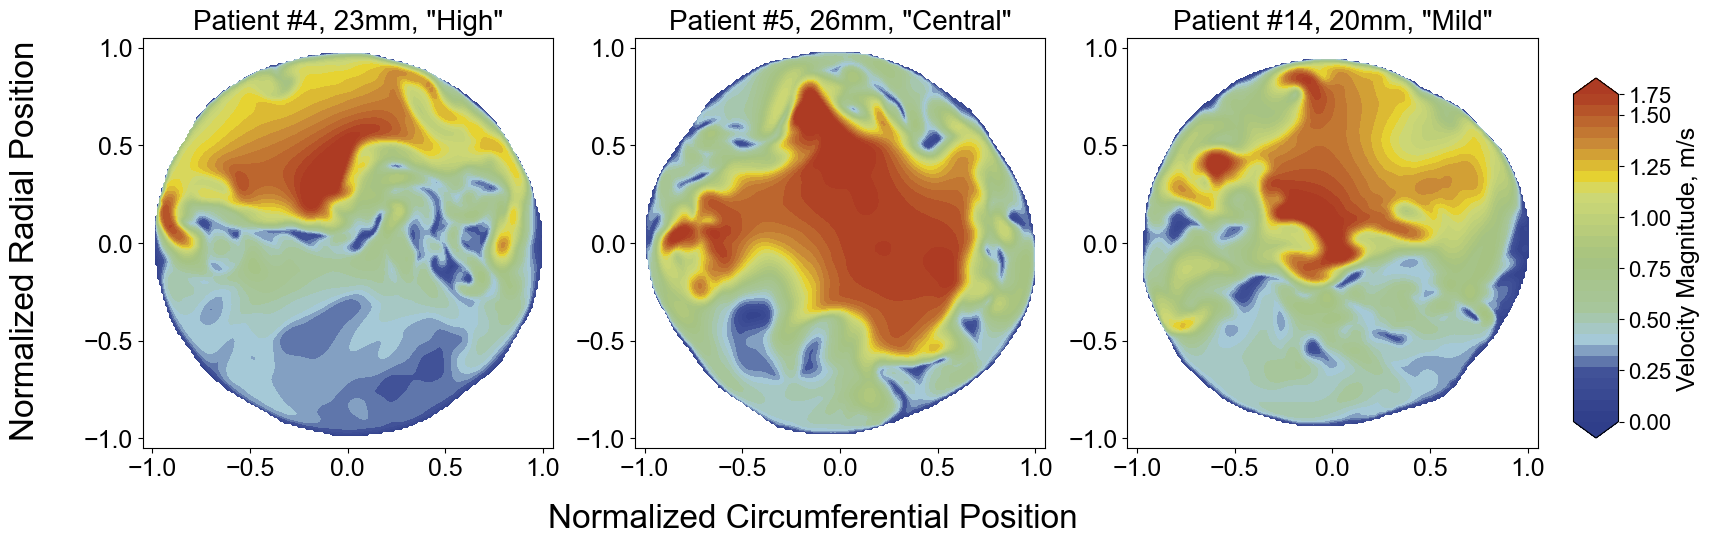

In [301]:
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

def custom_formatter(x, pos):
    # Show zero as plain '0'
    if abs(x) < 1e-10:
        return '0.00'
    else:
        return f'{x:.3f}'  # or other format

# Define the jet-like color stops
custom_colors = [
    (0.0,  "#2f3e8aff"),  # deep blue
    (0.15, "#415298ff"),  # blue
    (0.25, "#a5c9d8ff"),
    (0.35, "#a7c69aff"),  # cyan
    (0.5,  "#a6c380ff"),  # green-yellow
    (0.7,  "#d0d974ff"),  # yellow
    (0.75, "#e6d331ff"),
    (0.85, "#c98a37ff"),  # orange
    (1.0,  "#ad3b23ff"),  # red
]

# Create the custom colormap
custom_jet = LinearSegmentedColormap.from_list("custom_jet", custom_colors, N=256)

# csv1 = 'CSVs/profiles/VC_04_EccentricityProfile.csv'
# csv2 = 'CSVs/profiles/VC_05_EccentricityProfile.csv'
# csv3 = 'CSVs/profiles/VC_14_EccentricityProfile.csv'

csv1 = 'CSVs/profiles/VC_04_Updated_Ecc.csv'
csv2 = 'CSVs/profiles/VC_05_Updated_Ecc.csv'
csv3 = 'CSVs/profiles/VC_14_Updated_Ecc.csv'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

tick_positions = [1.0, 0.5, 0, -0.5, -1.0]
# # Plot 1
df1 = pd.read_csv(csv1)
x1, y1 = df1['XPrime'].values, df1['YPrime'].values
U1, V1, W1 = df1['U'].values, df1['V'].values, df1['W'].values
Umag1 = np.sqrt(U1**2 + V1**2 + W1**2)
xi1 = np.linspace(x1.min(), x1.max(), 200)
yi1 = np.linspace(y1.min(), y1.max(), 200)
Xi1, Yi1 = np.meshgrid(xi1, yi1)
Zi1 = griddata((x1, y1), Umag1, (Xi1, Yi1), method='cubic')
xc1, yc1 = x1.mean(), y1.mean()
radius1 = max(np.sqrt((x1 - xc1)**2 + (y1 - yc1)**2))
mask1 = ((Xi1 - xc1)**2 + (Yi1 - yc1)**2 > radius1**2) | (Zi1 <= 0.01)
Zi1 = np.ma.masked_where(mask1, Zi1)
level1 = np.linspace (0,1.4,31)
cf1 = ax1.contourf(Xi1, Yi1, Zi1, levels=level1, linestyles='-', cmap=custom_jet, extend='both')
cf1.set_edgecolor("face")
ax1.set_title('Patient #4, 23mm, "High"', fontsize=20)
ax1.set_aspect('equal')
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)
ax1.set_xticks(tick_positions)
ax1.set_yticks(tick_positions)
ax1.tick_params(axis='both', which='major', labelsize=18)



# # Plot 2
df2 = pd.read_csv(csv2)
x2, y2 = df2['XPrime'].values, df2['YPrime'].values
U2, V2, W2 = df2['U'].values, df2['V'].values, df2['W'].values
Umag2 = np.sqrt(U2**2 + V2**2 + W2**2)
xi2 = np.linspace(x2.min(), x2.max(), 200)
yi2 = np.linspace(y2.min(), y2.max(), 200)
Xi2, Yi2 = np.meshgrid(xi2, yi2)
Zi2 = griddata((x2, y2), Umag2, (Xi2, Yi2), method='cubic')
xc2, yc2 = x2.mean(), y2.mean()
radius2 = max(np.sqrt((x2 - xc2)**2 + (y2 - yc2)**2))
mask2 = ((Xi2 - xc2)**2 + (Yi2 - yc2)**2 > radius2**2) | (Zi2 <= 0.01)
Zi2 = np.ma.masked_where(mask2, Zi2)
level2 = np.linspace (0,1.0,31)
cf2 = ax2.contourf(Xi2, Yi2, Zi2, levels=level2, linestyles='-', cmap=custom_jet, extend='both')
cf2.set_edgecolor("face")
ax2.set_title('Patient #5, 26mm, "Central"',fontsize=20)
ax2.set_aspect('equal')
ax2.set_xlim(-1.05, 1.05)
ax2.set_ylim(-1.05, 1.05)
ax2.set_xticks(tick_positions)
ax2.set_yticks(tick_positions)
ax2.tick_params(axis='both', which='major', labelsize=18)

# Plot 3
df3 = pd.read_csv(csv3)
x3, y3 = df3['XPrime'].values, df3['YPrime'].values
U3, V3, W3 = df3['U'].values, df3['V'].values, df3['W'].values
Umag3 = np.sqrt(U3**2 + V3**2 + W3**2)
xi3 = np.linspace(x3.min(), x3.max(), 200)
yi3 = np.linspace(y3.min(), y3.max(), 200)
Xi3, Yi3 = np.meshgrid(xi3, yi3)
Zi3 = griddata((x3, y3), Umag3, (Xi3, Yi3), method='cubic')
xc3, yc3 = x3.mean(), y3.mean()
radius3 = max(np.sqrt((x3 - xc3)**2 + (y3 - yc3)**2))
mask3 = ((Xi3 - xc3)**2 + (Yi3 - yc3)**2 > radius3**2) | (Zi3 <= 0.01)
Zi3 = np.ma.masked_where(mask3, Zi3)
level3 = np.linspace (0,1.6,31)
cf3 = ax3.contourf(Xi3, Yi3, Zi3, levels=level3, linestyles='-', cmap=custom_jet, extend='both')
cf3.set_edgecolor("face")

ax3.set_title('Patient #14, 20mm, "Mild"', fontsize=20)
ax3.set_aspect('equal')
ax3.set_xlim(-1.05, 1.05)
ax3.set_ylim(-1.05, 1.05)
ax3.set_xticks(tick_positions)
ax3.set_yticks(tick_positions)
ax3.tick_params(axis='both', which='major', labelsize=18)

# formatter = FuncFormatter(custom_formatter)
# ax3.xaxis.set_major_formatter(formatter)
# ax3.yaxis.set_major_formatter(formatter)


tick_locs = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]
# You can add a common colorbar if needed:
cax = fig.add_axes([0.92, 0.17, 0.025, 0.6]) # [left, bottom, width, height] (fig fraction)
cbar = fig.colorbar(cf3, cax=cax)
# cbar = fig.colorbar(cf3, ax=[ax1, ax2, ax3], orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('Velocity Magnitude, m/s', fontsize=18)
cbar.set_ticks(tick_locs)
cbar.ax.tick_params(labelsize=16)

fig.supxlabel('Normalized Circumferential Position ', fontsize=24)  # Add common xlabel
# fig.supylabel('Normalized distance, z ', fontsize=24, labelpad=2.0)  # Add common xlabel
fig.text(0.06, 0.5, 'Normalized Radial Position', ha='center', va='center', fontsize=24, rotation=90)

# plt.xlabel('Normalized distance, x')
# fig.tight_layout(pad=2.0)  # decreases space around subplots

# plt.show()
plt.savefig('jet_eccentricity.pdf', bbox_inches='tight')

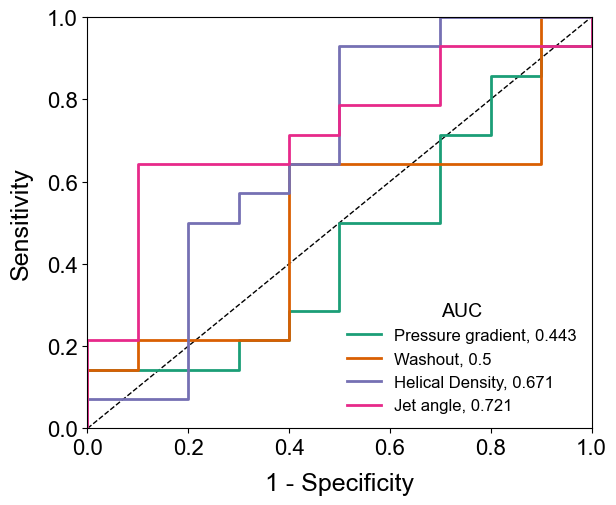

In [45]:
# Load your CSV
df = pd.read_csv("CSVs/AUC_individual.csv")


# Set up figure
fig, ax1 = plt.subplots(figsize=(6, 5))

# Replace these with the actual column names for your metric
pgrad_sens = df["Sensitivity_Pgrad"].values
pgrad_spec = df["Specificity_Pgrad"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
wash_sens = df["Sensitivity_wash"].values
wash_spec = df["Specificity_wash"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
helic_sens = df["Sensitivity_Helical"].values
helic_spec = df["Specificity_Helical"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
angle_sens = df["Sensitivity_jetAngle"].values
angle_spec = df["Specificity_jetAngle"].values   # this is the false positive rate
plt.plot([0,1], [0,1], 'k--', linewidth=1)


# plt.figure(figsize=(6,6))
plt.plot(pgrad_spec, pgrad_sens, linewidth=2, color='#1b9e77', label='Pressure gradient, 0.443')
plt.plot(wash_spec, wash_sens, linewidth=2, color='#d95f02', label='Washout, 0.5')
plt.plot(helic_spec, helic_sens, linewidth=2, color='#7570b3', label='Helical Density, 0.671')
plt.plot(angle_spec, angle_sens, linewidth=2,color='#e7298a', label='Jet angle, 0.721')
# plt.plot([0,1], [0,1], 'k--')   # diagonal reference line

plt.xlabel("1 - Specificity",fontsize=18, labelpad=10)
plt.ylabel("Sensitivity", fontsize=18, labelpad=10)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False, title='AUC', title_fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)
# plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
plt.xlim(0,1)
plt.ylim(0,1) # fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('AUC_individual.pdf', bbox_inches='tight')

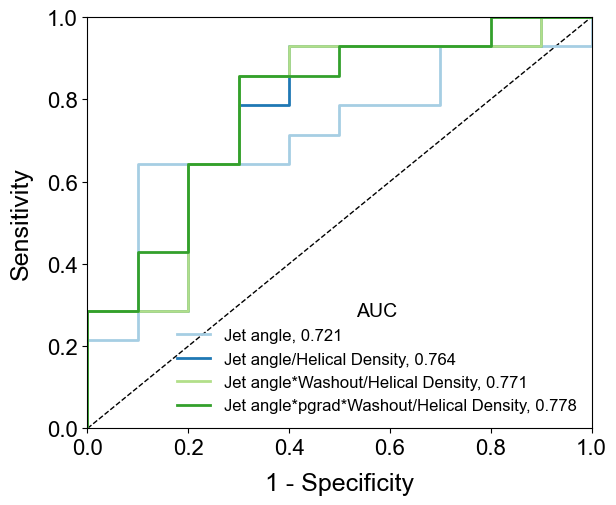

In [48]:
# Load your CSV
df = pd.read_csv("CSVs/AUC_combined.csv")


# Set up figure
fig, ax1 = plt.subplots(figsize=(6, 5))

# Replace these with the actual column names for your metric
sens_01 = df["Sensitivity_1"].values
spec_01 = df["Specificity_1"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
sens_02 = df["Sensitivity_2"].values
spec_02 = df["Specificity_2"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
sens_03 = df["Sensitivity_3"].values
spec_03 = df["Specificity_3"].values   # this is the false positive rate

# Replace these with the actual column names for your metric
sens_04 = df["Sensitivity_4"].values
spec_04 = df["Specificity_4"].values   # this is the false positive rate

plt.plot([0,1], [0,1], 'k--', linewidth=1)


# plt.figure(figsize=(6,6))
plt.plot(spec_01, sens_01, linewidth=2, color='#a6cee3', label='Jet angle, 0.721')
plt.plot(spec_02, sens_02, linewidth=2, color='#1f78b4', label='Jet angle/Helical Density, 0.764')
plt.plot(spec_03, sens_03, linewidth=2, color='#b2df8a', label='Jet angle*Washout/Helical Density, 0.771')
plt.plot(spec_04, sens_04, linewidth=2, color='#33a02c', label='Jet angle*pgrad*Washout/Helical Density, 0.778')


plt.xlabel("1 - Specificity",fontsize=18, labelpad=10)
plt.ylabel("Sensitivity", fontsize=18, labelpad=10)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False, title='AUC', title_fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)
# plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
plt.xlim(0,1)
plt.ylim(0,1) # fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('AUC_combined.pdf', bbox_inches='tight')

## True Eccentricity

/tmp/ipykernel_2225494/4047303007.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12, frameon=False)


<Figure size 640x480 with 0 Axes>

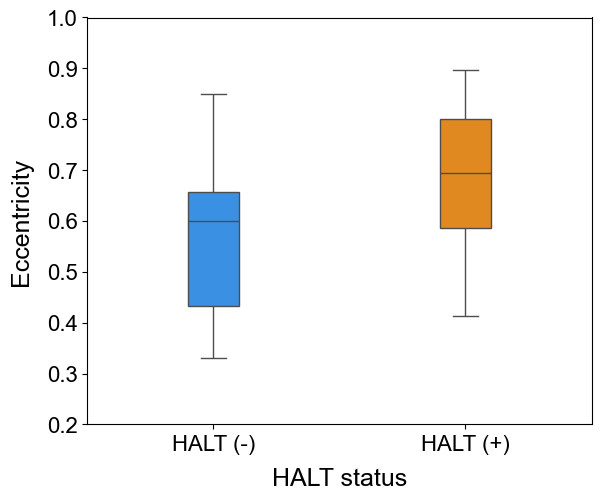

In [17]:
import pandas as pd

df = pd.read_csv('CSVs/true_eccentricity.csv')


# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x="HALT_status",
    y="eccentricity",
    hue="HALT_status",
    palette={"HALT (-)": "dodgerblue", "HALT (+)": "darkorange"},
    gap=0.000001,
    width=0.2
    )
#plt.title("SAPIEN3")
plt.ylabel("Eccentricity", fontsize=18, labelpad=10)
plt.xlabel("HALT status", fontsize=18, labelpad=10)
plt.ylim(0.2, 1.0)
ax=plt.gca()
plt.tight_layout()
ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)

# plt.text(-0.1, 1.05, "B", transform=plt.gca().transAxes,
         # fontsize=20, fontweight="bold")

# plt.show()
plt.savefig('eccentricity_bar.pdf', bbox_inches='tight')

## Flowrate

<Figure size 640x480 with 0 Axes>

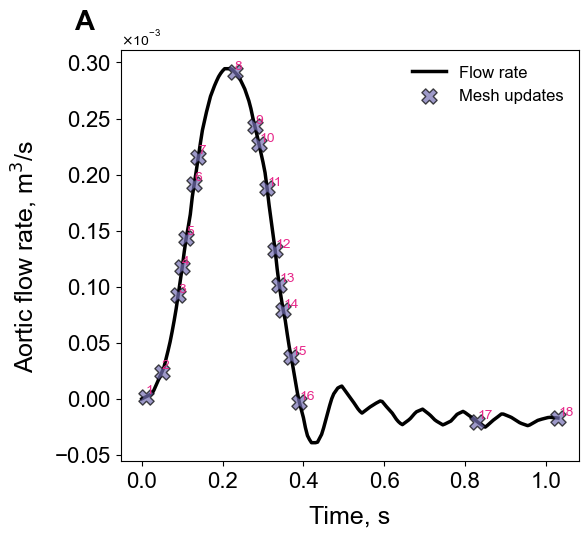

In [39]:
from matplotlib.ticker import ScalarFormatter


df = pd.read_csv("CSVs/flowRate.csv")



time = df['Time'].values
flow = df['Flow Rate'].values

# Plot
fig = plt.figure()
plt.figure(figsize=(6, 5))
plt.plot(time, flow, linewidth=2.5, label='Flow rate', color='k')

marker_times = [0.01,0.05,0.09,0.1,0.11,0.13,0.14,0.23,0.28,0.29,0.31,0.33,0.34,0.35,0.37,0.39,0.83,1.03]  
marker_style = 'X'
marker_size = 120
marker_flow = np.interp(marker_times, time, flow)
marker_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] 


plt.scatter(
    marker_times,
    marker_flow,
    s=marker_size,
    marker=marker_style,
    label='Mesh updates',
    color='#7570b3', alpha=0.7, edgecolors='k',
    zorder=3
)

for t, f, lbl in zip(marker_times, marker_flow, marker_labels):
    plt.text(
        t,
        f,
        str(lbl),
        ha='left',
        va='bottom',
        fontsize=10,
        color='#e7298a'
    )

#plt.title("SAPIEN3")
plt.ylabel("Aortic flow rate, m$^3$/s", fontsize=18, labelpad=10)
plt.xlabel("Time, s", fontsize=18, labelpad=10)
# plt.ylim(1.0, 25.0)
ax=plt.gca()
plt.tight_layout()

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, -3))   # force 10^-3
ax.yaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3))

ax.legend(fontsize=12, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)
plt.text(-0.1, 1.05, "A", transform=plt.gca().transAxes,
         fontsize=20, fontweight="bold")
# plt.show()
plt.savefig('flowrate.pdf', bbox_inches='tight')